<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/Note_07_Miscellaneous_Advanced_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- This file discusses about the sophisticated methods for improving the accuracy and adaptability of tagging systems.
- While traditional approaches like unigram and bigram taggers perform reasonably well for simple tagging tasks, these advanced methods push the boundaries of POS tagging, making it more robust, scalable, and adaptable to real-world use cases.




### **1. Transformation-Based Tagging**

- **Transformation-Based Learning (TBL)**, also known as **Brill Tagging**, is a rule-based approach that iteratively refines tagging decisions by learning transformation rules from data.
- This method was proposed by Eric Brill in 1995 and provides a hybrid approach between rule-based and statistical methods.



#### Key Concepts:
- **Initial State Tagging**:
  - The algorithm starts with a basic tagger, often assigning the most frequent tag (e.g., a unigram tagger).
- **Learning Transformations**:
  - During training, the algorithm learns a set of transformation rules that "correct" mistakes made by the initial tagger.
  - Each rule specifies conditions under which the tag should be changed (e.g., "if a word is tagged as a noun but is preceded by an adjective, change it to a verb").
- **Iterative Refinement**:
  - At each iteration, the system looks for the most effective transformation that improves tagging accuracy.
  - Over multiple iterations, the system learns a sequence of rules that correct errors, improving accuracy over time.



#### Example of a Transformation Rule:
1. **Before Rule Application**:  
   Input sentence: "The **bank** closes at 5 PM."  
   Incorrect Tagging: `bank` is tagged as a verb.
2. **Rule Learned**:  
   "If a word is preceded by a determiner (e.g., 'The'), it is more likely to be a noun."
3. **After Rule Application**:  
   Correct Tagging: `bank` is tagged as a noun.



#### Advantages:
- **Explainability**: The rules are human-readable and interpretable, making the tagging process transparent.
- **Customizability**: Since the rules are explicitly learned, they can be fine-tuned to specific domains (e.g., medical or legal text).
- **Efficiency**: The method is computationally efficient and can be trained on relatively small datasets.



#### Limitations:
- **Requires Domain-Specific Knowledge**: While the rules are interpretable, they may need to be adapted or extended when dealing with domain-specific texts.
- **Limited in Handling Long-Range Dependencies**: TBL works well with local contextual information but may struggle with long-range dependencies in sentences.




In [ ]:
# Import necessary libraries and classes from NLTK
import nltk  # Main library for NLP tools
from nltk.corpus import treebank  # Penn Treebank corpus with POS-tagged data
from nltk.tag import UnigramTagger, BrillTaggerTrainer  # Unigram tagger and Brill trainer for tagging
from nltk.tag.brill import Template, Pos  # Template class for defining transformation rules for Brill Tagger

# Download necessary data resources
nltk.download('brill_tagger')  # Download Brill tagger templates
nltk.download('treebank')  # Download the Penn Treebank corpus for tagged sentences
nltk.download('punkt')  # Download the tokenizer required for sentence tokenization


[nltk_data] Error loading brill_tagger: Package 'brill_tagger' not
[nltk_data]     found in index
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Load the tagged sentences from the Penn Treebank corpus
# These sentences are manually annotated with parts of speech
tagged_sents = treebank.tagged_sents()

# Split the dataset into training and testing sets
# train_data: The data used to train the taggers (first 3000 sentences)
# test_data: The data used to evaluate the tagger's performance (remaining sentences)
train_data = tagged_sents[:3000]
test_data = tagged_sents[3000:]

# Step 1: Create a baseline Unigram tagger
# Unigram tagger tags each word with the most frequent tag it has in the training data
unigram_tagger = UnigramTagger(train_data)

# Evaluate the performance of the Unigram tagger on the test data
# The evaluate method checks how well the tagger performs by comparing predicted tags with the actual tags
print(f"Unigram Tagger Accuracy: {unigram_tagger.evaluate(test_data):.4f}")  # Output the accuracy


<ipython-input-18-18c0d8af4b84>:17: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(f"Unigram Tagger Accuracy: {unigram_tagger.evaluate(test_data):.4f}")  # Output the accuracy


Unigram Tagger Accuracy: 0.8572


In [ ]:
# Step 2: Define transformation templates for Brill Tagger
# Templates tell the Brill tagger which patterns to look for when learning rules
# Pos([-1]) means looking at the POS tag of the previous word
# Pos([1]) means looking at the POS tag of the next word
# Pos([-1, 0]) means looking at the previous and current POS tags
# Pos([0, 1]) means looking at the current and next POS tags
templates = [
    Template(Pos([-1])),  # Check previous POS tag to create transformation rules
    Template(Pos([1])),   # Check next POS tag
    Template(Pos([-1, 0])),  # Check both previous and current POS tags
    Template(Pos([0, 1])),   # Check both current and next POS tags
]

In [ ]:
# Step 3: Initialize BrillTaggerTrainer
# BrillTaggerTrainer is initialized with the initial UnigramTagger and the set of transformation templates
trainer = BrillTaggerTrainer(initial_tagger=unigram_tagger, templates=templates)


In [ ]:
# Step 4: Train the Brill Tagger
# Train the Brill tagger using the training data
# max_rules=50: Learn up to 50 transformation rules
# min_score=3.0: Only learn rules that improve accuracy by a score of 3.0 or higher
brill_tagger = trainer.train(train_data, max_rules=50, min_score=3.0)

# Step 5: Evaluate the Brill Tagger on the test data
# The evaluate method calculates the accuracy of the Brill tagger
print(f"Brill Tagger Accuracy: {brill_tagger.evaluate(test_data):.4f}")  # Output the improved accuracy


<ipython-input-21-5ca094e3d2a4>:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(f"Brill Tagger Accuracy: {brill_tagger.evaluate(test_data):.4f}")  # Output the improved accuracy


Brill Tagger Accuracy: 0.8695


In [ ]:
# Step 6: Compare the accuracy of Unigram Tagger and Brill Tagger
# Evaluate both taggers and compare their performance
unigram_accuracy = unigram_tagger.evaluate(test_data)
brill_accuracy = brill_tagger.evaluate(test_data)

# Print both accuracies for comparison
print(f"Initial Unigram Tagger Accuracy: {unigram_accuracy:.4f}")
print(f"Improved Brill Tagger Accuracy: {brill_accuracy:.4f}")

<ipython-input-22-b4746905e8d9>:3: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_accuracy = unigram_tagger.evaluate(test_data)
<ipython-input-22-b4746905e8d9>:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  brill_accuracy = brill_tagger.evaluate(test_data)


Initial Unigram Tagger Accuracy: 0.8572
Improved Brill Tagger Accuracy: 0.8695


In [ ]:
# Step 7: Apply the Brill Tagger on a new sentence
# Example sentence for tagging
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the sentence into individual words
tokens = nltk.word_tokenize(sentence)

# Tag the tokenized sentence using the Brill tagger
tagged_sentence = brill_tagger.tag(tokens)

# Output the tagged sentence to see the POS tags assigned by the Brill tagger
print(tagged_sentence)

[('The', 'DT'), ('quick', 'JJ'), ('brown', None), ('fox', None), ('jumps', None), ('over', 'IN'), ('the', 'DT'), ('lazy', None), ('dog', None), ('.', '.')]


### **2. Machine Learning-Based Tagging**

- The application of **machine learning algorithms** to POS tagging has become increasingly prevalent.
- These methods move beyond rule-based approaches by learning from data and making probabilistic predictions about the appropriate tags for each word.
- Two common machine learning techniques applied to POS tagging are **Naive Bayes** and **Decision Trees**.



#### a. **Naive Bayes Tagging**
- Note:
  - The **Naive Bayes classifier** assumes that the probability of a word having a particular POS tag is independent of other words in the sentence, given the tag.
  - While this assumption is rarely true in practice, Naive Bayes often performs well for POS tagging due to its simplicity and efficiency.

- **Conditional Probabilities**: The classifier assigns a tag to a word based on the maximum likelihood, computed using the conditional probability of the word given the tag and the prior probability of the tag.
  
  Formula:  

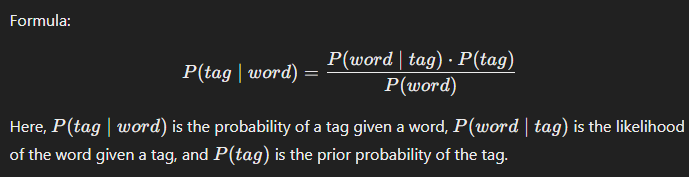

- **Strengths**:
  - Fast and easy to implement.
  - Performs well with limited training data.
  
- **Weaknesses**:
  - The independence assumption is often violated in natural language.
  - Less effective when dealing with complex sentence structures and long-range dependencies.



In [ ]:
# Import necessary libraries and modules from NLTK
import nltk  # NLTK is the Natural Language Toolkit, a popular library for text processing in Python
from nltk.corpus import treebank  # The Penn Treebank corpus contains manually annotated parts-of-speech (POS) tagged sentences
from nltk import NaiveBayesClassifier, classify  # Import NaiveBayesClassifier for classification and classify module for accuracy evaluation
from nltk.tag import UnigramTagger  # UnigramTagger is a simple POS tagger based on word frequency
from nltk.classify import apply_features  # A helper function to efficiently apply features to datasets

# Download necessary NLTK resources (treebank corpus and tokenizers)
nltk.download('treebank')  # Penn Treebank contains syntactically parsed sentences (POS-tagged)
nltk.download('punkt')  # Punkt tokenizer used for word tokenization in NLTK

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Step 1: Load the Penn Treebank corpus
# The treebank corpus consists of sentences that are manually annotated with POS tags.
# Each sentence is a list of (word, POS tag) tuples.
tagged_sents = treebank.tagged_sents()  # Load all the POS-tagged sentences

# Split the data into training and test sets
# train_data: This data will be used to train the Naive Bayes classifier.
# test_data: This data will be used to evaluate how well the trained classifier performs.
train_data = tagged_sents[:3000]  # First 3000 sentences are used for training
test_data = tagged_sents[3000:]   # The remaining sentences are used for testing


In [ ]:
# Step 2: Define a feature extraction function for each word in the sentence
# The Naive Bayes classifier requires a set of features for each word to make predictions.
# Features may include the word itself, surrounding words (previous, next), and any suffixes.
def pos_features(sentence, i):
    """
    Feature extractor for each word in the sentence.
    Features extracted:
    - The word itself (current word)
    - The previous word (if it exists, otherwise mark as '<START>')
    - The next word (if it exists, otherwise mark as '<END>')
    - The suffix of the word (e.g., last three characters to capture patterns like 'ing', 'ed')

    Parameters:
    - sentence: list of words in the sentence
    - i: the index of the word we want to extract features for

    Returns:
    - A dictionary of features for the word at index i
    """
    features = {}  # Dictionary to hold the features for the current word
    word = sentence[i]  # The current word we are extracting features for

    # Current word as a feature (basic feature)
    features['word'] = word

    # Previous word as a feature
    if i == 0:  # If this is the first word in the sentence
        features['prev-word'] = '<START>'  # Use <START> to indicate no previous word
    else:
        features['prev-word'] = sentence[i - 1]  # The actual previous word

    # Next word as a feature
    if i == len(sentence) - 1:  # If this is the last word in the sentence
        features['next-word'] = '<END>'  # Use <END> to indicate no next word
    else:
        features['next-word'] = sentence[i + 1]  # The actual next word

    # Suffix feature (the last three characters of the word)
    # This is useful for identifying common suffixes in words like '-ing', '-ed', etc.
    if len(word) > 3:
        features['suffix'] = word[-3:]  # The last 3 characters of the word
    else:
        features['suffix'] = word  # If the word is too short, use the entire word as the suffix

    return features  # Return the dictionary of features

In [ ]:
# Step 3: Prepare the data by converting each word into feature sets
# We need to apply our feature extraction function to both the training and test data
# The classifier expects a list of tuples where each tuple is (features, label)
def prepare_data(tagged_sentences):
    """
    Prepare the feature sets and labels (tags) for the classifier.
    Converts tagged sentences into feature-tag pairs.

    Parameters:
    - tagged_sentences: list of tagged sentences, where each sentence is a list of (word, POS tag) tuples

    Returns:
    - A list of feature sets and corresponding POS tags
    """
    feature_sets = []  # This will hold the feature-tag pairs
    for tagged_sentence in tagged_sentences:  # Loop over each tagged sentence
        untagged_sentence = [word for word, tag in tagged_sentence]  # Extract the words from the tagged sentence
        tagged_words = [tag for word, tag in tagged_sentence]  # Extract the POS tags from the tagged sentence
        for i in range(len(tagged_sentence)):  # Loop over each word in the sentence
            features = pos_features(untagged_sentence, i)  # Extract features for the current word
            feature_sets.append((features, tagged_words[i]))  # Append (features, POS tag) to the feature set
    return feature_sets  # Return the complete feature set

# Convert the training and test data into feature sets
# We apply the feature extraction function to each sentence in the training and test data
train_set = prepare_data(train_data)  # Prepare feature sets from the training data
test_set = prepare_data(test_data)  # Prepare feature sets from the test data


In [ ]:
# Step 4: Train the Naive Bayes classifier using the feature sets
# We use the NaiveBayesClassifier provided by NLTK to train the model
# The classifier will learn the relationships between features and POS tags
classifier = NaiveBayesClassifier.train(train_set)  # Train the classifier on the training data

# Step 5: Evaluate the accuracy of the Naive Bayes classifier on the test data
# We use the NLTK classify.accuracy() function to measure how well the classifier performs on the test set
accuracy = classify.accuracy(classifier, test_set)  # Calculate the accuracy of the classifier
print(f"Naive Bayes POS Tagger Accuracy: {accuracy:.4f}")  # Output the accuracy as a percentage


Naive Bayes POS Tagger Accuracy: 0.9305


In [ ]:
# Step 6: Test the classifier on a new sentence
# Tokenize a sample sentence and use the trained classifier to predict POS tags for each word
sentence = "The quick brown fox jumps over the lazy dog."  # Example sentence
tokens = nltk.word_tokenize(sentence)  # Tokenize the sentence into words

# Extract features for each word in the new sentence using the pos_features function
sentence_features = [pos_features(tokens, i) for i in range(len(tokens))]  # Extract features for each word

# Use the trained Naive Bayes classifier to classify the POS tags of each word in the sentence
classified_tags = classifier.classify_many(sentence_features)  # Classify all the words at once

# Output the words and their predicted POS tags
tagged_sentence = list(zip(tokens, classified_tags))  # Combine the words with their predicted POS tags
print("Tagged Sentence:", tagged_sentence)  # Print the tagged sentence

Tagged Sentence: [('The', 'DT'), ('quick', 'NNP'), ('brown', 'JJ'), ('fox', 'VBP'), ('jumps', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NNS'), ('.', '.')]


#### b. **Decision Tree Tagging**
**Decision trees** provide a more flexible way to model tagging decisions by learning a series of decision rules based on word features, such as whether a word is capitalized or its position in the sentence.

- **Feature Selection**: The decision tree algorithm splits the data based on features that provide the most significant reduction in uncertainty (e.g., entropy).
- **Recursive Partitioning**: The tree recursively splits the data into subsets, learning rules for assigning tags based on features.
  
  Example:
  1. If a word is at the beginning of a sentence and capitalized, it is more likely to be a proper noun.
  2. If a word ends in "ing," it is likely a verb.

- **Advantages**:
  - **Non-linear**: Decision trees can model non-linear relationships in the data.
  - **Feature Flexibility**: The algorithm can incorporate a wide range of features, not just the word itself, but also context, word morphology, etc.
  
- **Disadvantages**:
  - Prone to overfitting, especially with small datasets.
  - Sensitive to noise and requires careful tuning.




#### Code Demonstrations

In [ ]:
# Import necessary libraries and modules from NLTK
import nltk  # NLTK is a comprehensive library for working with NLP tasks in Python
from nltk.corpus import treebank  # Penn Treebank corpus, which contains POS-tagged sentences
from nltk import DecisionTreeClassifier, classify  # Import DecisionTreeClassifier for POS tagging and classify for evaluating performance

# Step 1: Download necessary resources from NLTK
nltk.download('treebank')  # Download the Penn Treebank corpus, which is used for training and testing
nltk.download('punkt')  # Download the Punkt tokenizer model for word tokenization


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

# Step 2: Load the Penn Treebank corpus
# The Penn Treebank contains manually tagged POS data, which we'll use for training and evaluation.
# `tagged_sents` retrieves a list of sentences where each sentence contains tuples of (word, POS tag).
tagged_sents = treebank.tagged_sents()


In [ ]:
# Step 3: Split the data into training and test sets
# Here we limit the number of sentences to avoid memory overuse (200 for training and 50 for testing).
# `train_data` will be used to train the Decision Tree Classifier, while `test_data` will be used to test its performance.
train_data = tagged_sents[:200]  # First 200 sentences for training
test_data = tagged_sents[200:250]  # Next 50 sentences for testing



In [ ]:
# Step 4: Feature Extraction Function
# To train the Decision Tree Classifier, we need to extract relevant features from each word in a sentence.
# This function generates features for each word such as the word itself, whether it's capitalized, and its suffix.
def pos_features(sentence, i):
    """
    Extracts features for the word at index i in the sentence.

    Features:
    - 'word': the word itself (in lowercase)
    - 'is_first': whether it's the first word in the sentence
    - 'is_last': whether it's the last word in the sentence
    - 'is_capitalized': whether the word starts with an uppercase letter
    - 'suffix': the last three characters of the word (useful for identifying patterns like '-ing', '-ed')
    - 'prev_word': the previous word (if it exists, else a special '<START>' marker)
    - 'next_word': the next word (if it exists, else a special '<END>' marker)

    Parameters:
    - sentence: a list of words in the sentence
    - i: the index of the word to extract features for

    Returns:
    - A dictionary of extracted features for the word at index i
    """
    # Initialize a dictionary to store features
    features = {
        'word': sentence[i].lower(),  # Store the word itself in lowercase to avoid case sensitivity
        'is_first': i == 0,  # True if it's the first word in the sentence, otherwise False
        'is_last': i == len(sentence) - 1,  # True if it's the last word in the sentence, otherwise False
        'is_capitalized': sentence[i][0].isupper(),  # True if the word starts with a capital letter
        'suffix': sentence[i][-3:],  # The last three characters of the word (helps with patterns like '-ing', '-ed')
        'prev_word': '' if i == 0 else sentence[i - 1].lower(),  # The previous word (empty if it's the first word)
        'next_word': '' if i == len(sentence) - 1 else sentence[i + 1].lower(),  # The next word (empty if it's the last word)
    }
    return features  # Return the dictionary of features for the word



In [ ]:
# Step 5: Data Preparation Function
# This function converts each sentence into feature sets (dictionary of features for each word) paired with the corresponding POS tag.
# These feature-tag pairs will be used by the classifier to learn the mapping from features to POS tags.
def prepare_data(tagged_sentences):
    """
    Converts tagged sentences into feature-label pairs (for training/testing).

    Parameters:
    - tagged_sentences: A list of sentences, where each sentence is a list of (word, POS tag) tuples

    Returns:
    - A list of feature sets and corresponding POS tags
    """
    feature_sets = []  # List to store (features, tag) pairs for all words in all sentences
    for tagged_sentence in tagged_sentences:  # Loop over each sentence
        words = [word for word, tag in tagged_sentence]  # Extract the list of words from the sentence
        tags = [tag for word, tag in tagged_sentence]  # Extract the corresponding POS tags from the sentence
        for i in range(len(tagged_sentence)):  # Loop over each word in the sentence
            features = pos_features(words, i)  # Extract features for the current word
            feature_sets.append((features, tags[i]))  # Pair the features with the corresponding POS tag
    return feature_sets  # Return the list of (features, tag) pairs



In [ ]:
# Step 6: Prepare the training and testing datasets
train_set = prepare_data(train_data)  # Extract feature-tag pairs for the training data
test_set = prepare_data(test_data)  # Extract feature-tag pairs for the test data



In [ ]:
# Step 7: Train the Decision Tree Classifier
# We train the DecisionTreeClassifier using the feature sets from the training data.
# `entropy_cutoff` and `depth_cutoff` are used to prevent overfitting and reduce memory usage.
classifier = nltk.DecisionTreeClassifier.train(train_set, entropy_cutoff=0.05, depth_cutoff=5)



In [ ]:
# Step 8: Evaluate the classifier's performance
# `classify.accuracy()` computes the accuracy of the classifier on the test data.
accuracy = classify.accuracy(classifier, test_set)  # Measure how well the classifier performs on unseen data (test set)
print(f"Decision Tree POS Tagger Accuracy: {accuracy:.4f}")  # Output the accuracy as a percentage



Decision Tree POS Tagger Accuracy: 0.6396


In [ ]:
# Step 9: Test the classifier on a new, unseen sentence
# We tokenize a sample sentence and use the trained classifier to predict POS tags for each word.
sentence = "The quick brown fox jumps over the lazy dog."  # Example sentence for testing
tokens = nltk.word_tokenize(sentence)  # Tokenize the sentence into individual words
test_features = [pos_features(tokens, i) for i in range(len(tokens))]  # Extract features for each word in the sentence
predicted_tags = [classifier.classify(f) for f in test_features]  # Classify each word using the trained classifier

In [ ]:
# Step 10: Print the tagged sentence (word-POS pairs)
tagged_sentence = list(zip(tokens, predicted_tags))  # Pair each word with its predicted POS tag
print("Tagged Sentence:", tagged_sentence)  # Print the POS-tagged sentence


Tagged Sentence: [('The', 'DT'), ('quick', '.'), ('brown', '.'), ('fox', '.'), ('jumps', '.'), ('over', 'IN'), ('the', 'DT'), ('lazy', '.'), ('dog', '.'), ('.', '.')]


### **3. Maximum Entropy Models**

A more sophisticated machine learning technique for POS tagging is the **Maximum Entropy (MaxEnt) model**. Unlike Naive Bayes, which makes simplifying independence assumptions, MaxEnt allows for dependencies between features.



#### Key Concepts:
- **Conditional Probability Modeling**: MaxEnt models estimate the probability of a tag given a set of features (e.g., surrounding words, word morphology) without making strong independence assumptions.
- **Feature Weights**: The model assigns weights to each feature based on its importance for predicting the correct tag.
  
  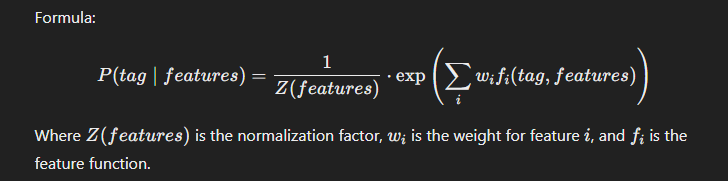

#### Advantages:
- **Flexibility**: Can model more complex dependencies between words and their context.
- **High Accuracy**: Often achieves better accuracy than simpler models like Naive Bayes.



#### Disadvantages:
- **Computational Cost**: Training MaxEnt models can be computationally expensive due to the need for iterative optimization.




#### Code Implementation

In [ ]:
# Import necessary libraries and modules
import nltk
from nltk.corpus import treebank  # Penn Treebank corpus for POS-tagged sentences
from nltk.classify import MaxentClassifier  # MaxEnt classifier in NLTK
from nltk import classify  # For evaluating the classifier

# Download required resources from NLTK
nltk.download('treebank')  # Download Penn Treebank corpus
nltk.download('punkt')  # Tokenizer used for tokenizing new input sentences

# Step 1: Load the Penn Treebank corpus
# Load sentences that are POS-tagged from the Penn Treebank corpus
tagged_sents = treebank.tagged_sents()


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

# Step 2: Split the dataset into training and testing sets
# Train with the first 3000 sentences and test with the next 500 sentences
train_data = tagged_sents[:3000]
test_data = tagged_sents[3000:3500]



In [ ]:
# Step 3: Define the feature extraction function
# The features used here include the word itself, whether it's capitalized, and its suffix.
def pos_features(sentence, i):
    """
    Feature extractor for each word in the sentence.
    Features include:
    - The word itself (lowercased).
    - Whether it's the first word in the sentence.
    - Whether it's the last word in the sentence.
    - Whether the word is capitalized.
    - The suffix of the word (last 3 characters).
    - The previous word and the next word (context).

    Parameters:
    - sentence: list of words in the sentence
    - i: index of the word in the sentence

    Returns:
    - A dictionary of features for the word at index i.
    """
    features = {
        'word': sentence[i].lower(),  # The current word, in lowercase
        'is_first': i == 0,  # Whether this is the first word
        'is_last': i == len(sentence) - 1,  # Whether this is the last word
        'is_capitalized': sentence[i][0].isupper(),  # Whether the word is capitalized
        'suffix': sentence[i][-3:],  # The last 3 characters of the word (helps with identifying suffix patterns)
        'prev_word': '' if i == 0 else sentence[i - 1].lower(),  # The previous word
        'next_word': '' if i == len(sentence) - 1 else sentence[i + 1].lower()  # The next word
    }
    return features


In [ ]:
# Step 4: Prepare the dataset by converting sentences to feature-tag pairs
# We loop through each sentence and for each word, extract features and pair them with their respective POS tag.
def prepare_data(tagged_sentences):
    """
    Converts a list of tagged sentences into feature-tag pairs.

    Parameters:
    - tagged_sentences: list of sentences where each sentence is a list of (word, POS tag) tuples

    Returns:
    - A list of (features, POS tag) pairs.
    """
    feature_sets = []
    for tagged_sentence in tagged_sentences:  # Loop over each tagged sentence
        sentence = [word for word, tag in tagged_sentence]  # Extract the words from the sentence
        tags = [tag for word, tag in tagged_sentence]  # Extract the POS tags from the sentence
        for i in range(len(tagged_sentence)):  # For each word in the sentence
            features = pos_features(sentence, i)  # Extract features for the word
            feature_sets.append((features, tags[i]))  # Pair the features with the POS tag
    return feature_sets

# Prepare the training and test datasets
train_set = prepare_data(train_data)
test_set = prepare_data(test_data)


In [ ]:
# Step 5: Train the Maximum Entropy (MaxEnt) classifier
# We use the MaxentClassifier.train() method from NLTK to train the model
# MaxEnt allows us to avoid independence assumptions by considering multiple features simultaneously.
classifier = MaxentClassifier.train(train_set, algorithm='iis', trace=0, max_iter=10)


`classifier = MaxentClassifier.train(train_set, algorithm='iis', trace=0, max_iter=10)`"

1. **`train_set`**: This is the dataset used for training the classifier. It consists of a list of feature-label pairs. In this case, the feature set includes word-level features like capitalization, suffix, and context, and the label corresponds to the POS tag.

2. **`algorithm='iis'`**: The algorithm specifies the optimization algorithm used to train the Maximum Entropy model. The available algorithms in NLTK include:
   - `'gis'` (Generalized Iterative Scaling)
   - `'iis'` (Improved Iterative Scaling)
   
   In this case, `'iis'` is chosen, which is typically faster and more efficient than `'gis'`, especially for NLP tasks.

3. **`trace=0`**: This argument controls the verbosity of the training process. A `trace` value of `0` means that no output will be displayed during training. Setting this to a higher value, like `1` or `2`, will show more information about the training progress (e.g., the number of iterations, improvements in accuracy).

4. **`max_iter=10`**: This specifies the maximum number of iterations for the training algorithm. The model will keep iterating and improving until this limit is reached, or until the algorithm converges (i.e., no further improvement in accuracy).

**Why MaxEnt and `iis` Algorithm?**

- **MaxEnt models** are particularly useful in cases where feature independence is not a valid assumption, unlike Naive Bayes. MaxEnt models make use of multiple features simultaneously and apply weights to these features based on their contribution to the classification task.
- The **IIS (Improved Iterative Scaling)** algorithm is chosen here because it generally converges faster and handles a wider variety of feature sets compared to GIS (Generalized Iterative Scaling).

By setting `max_iter=10`, the training is limited to 10 iterations, ensuring that the model does not overtrain. However, if you need better performance, increasing this value might lead to better results, but at the cost of longer training times.

In [ ]:
# Step 6: Evaluate the classifier's performance
# We evaluate how well the classifier performs on the test data by calculating its accuracy
accuracy = classify.accuracy(classifier, test_set)
print(f"Maximum Entropy POS Tagger Accuracy: {accuracy:.4f}")  # Print the accuracy


Maximum Entropy POS Tagger Accuracy: 0.8672


In [ ]:
# Step 7: Test the classifier on a new, unseen sentence
# Tokenize a sample sentence and classify its POS tags using the trained MaxEnt model
sentence = "The quick brown fox jumps over the lazy dog."  # Sample test sentence
tokens = nltk.word_tokenize(sentence)  # Tokenize the sentence into words

# Extract features for each word in the sentence
sentence_features = [pos_features(tokens, i) for i in range(len(tokens))]

# Use the classifier to predict the POS tags for the words in the sentence
predicted_tags = [classifier.classify(f) for f in sentence_features]

# Print the tagged sentence (word, POS tag) pairs
tagged_sentence = list(zip(tokens, predicted_tags))  # Zip the tokens with their predicted tags
print("Tagged Sentence:", tagged_sentence)  # Print the result


Tagged Sentence: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'NN'), ('dog', 'NN'), ('.', '.')]


### **4. Deep Learning-Based Tagging**

While traditional machine learning methods have been effective for POS tagging, **deep learning** has pushed the boundaries even further by automating feature extraction and learning from large datasets. Though not fully explored in this section, deep learning methods like **Recurrent Neural Networks (RNNs)**, **LSTMs**, and **Transformers** excel at capturing long-range dependencies and handling the intricacies of natural language.


### 4.1 POS Tagging Using Deep Learning-Based Methods (LSTM)


In [ ]:
# Import necessary libraries
import nltk  # Natural Language Toolkit for text processing
import torch  # PyTorch for building neural networks
import torch.nn as nn  # Neural network module from PyTorch
import torch.optim as optim  # Optimization algorithms
from sklearn.preprocessing import LabelEncoder  # For encoding POS tags
from nltk.corpus import treebank  # Penn Treebank for POS-tagged sentences
from torch.utils.data import Dataset, DataLoader  # For loading data in PyTorch
from sklearn.model_selection import train_test_split  # For splitting data into training and testing

# Download necessary resources
nltk.download('treebank')  # Download the Penn Treebank corpus
nltk.download('punkt')  # Download tokenizer


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### **Step 1: Load the Dataset**
   - **What Happens**:
     - The **Penn Treebank** corpus from **NLTK** is loaded, which contains sentences with words that are tagged with parts of speech.
     - The dataset is split into two lists: one containing sentences (words), and the other containing their corresponding POS tags.
   - **Purpose**:
     - The data is pre-tagged with POS information, making it suitable for training a supervised learning model like an LSTM.



In [ ]:

# Step 1: Load the Penn Treebank dataset
tagged_sentences = treebank.tagged_sents()

# Split the words and tags from each sentence
sentences = [[word for word, tag in sentence] for sentence in tagged_sentences]
pos_tags = [[tag for word, tag in sentence] for sentence in tagged_sentences]



#### **Step 2: Preprocessing the Data**
   - **What Happens**:
     - Each unique word in the dataset is mapped to a unique integer (word-to-index mapping) using a dictionary (`word_to_ix`). This allows the LSTM to work with numerical input data.
     - POS tags are also encoded into integers using **LabelEncoder**. This encoder assigns a unique number to each distinct POS tag in the dataset.
   - **Purpose**:
     - Machine learning models like LSTMs operate on numerical data, so text (words and POS tags) must be converted into numerical representations. This step prepares the data for model input.



In [ ]:
# Step 2: Preprocessing - Encoding words and POS tags into integers
# Use a dictionary for word indexing
word_to_ix = {}
for sent in sentences:
    for word in sent:
        if word.lower() not in word_to_ix:  # Lowercasing to handle case-insensitivity
            word_to_ix[word.lower()] = len(word_to_ix) + 1  # Assign a unique index to each word

# Encode POS tags
tag_encoder = LabelEncoder()
tag_encoder.fit([tag for tags in pos_tags for tag in tags])  # Fit on all POS tags in the corpus

# Create the vocabulary size and number of tags
vocab_size = len(word_to_ix) + 1  # Add 1 for padding index
num_tags = len(tag_encoder.classes_)  # Number of unique POS tags



#### **Step 3: Create a PyTorch Dataset**
   - **What Happens**:
     - A custom `POSTaggingDataset` class is created, inheriting from PyTorch's `Dataset` class.
     - In the `__getitem__()` method, each sentence is converted into a list of word indices (using the `word_to_ix` dictionary), and each POS tag is converted to its corresponding index.
     - Sentences and tags are padded to a fixed length (`max_len`) to ensure all sequences have the same length (necessary for batch processing in LSTM models).
   - **Purpose**:
     - The dataset is wrapped in a PyTorch-compatible structure so that it can be loaded efficiently using `DataLoader`. Padding ensures that all input sequences are of the same length, which is required for batch training in LSTMs.


In [ ]:
# Step 3: Dataset Preparation
# Define a PyTorch Dataset class for handling the data
class POSTaggingDataset(Dataset):
    def __init__(self, sentences, pos_tags, word_to_ix, tag_encoder, max_len):
        self.sentences = sentences
        self.pos_tags = pos_tags
        self.word_to_ix = word_to_ix
        self.tag_encoder = tag_encoder
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        tags = self.pos_tags[idx]

        # Convert words to indices
        word_indices = [self.word_to_ix[word.lower()] for word in sentence]

        # Pad or truncate sentences
        word_indices = word_indices[:self.max_len] + [0] * (self.max_len - len(word_indices))

        # Convert tags to indices
        tag_indices = self.tag_encoder.transform(tags)
        tag_indices = list(tag_indices[:self.max_len]) + [0] * (self.max_len - len(tag_indices))

        return torch.tensor(word_indices), torch.tensor(tag_indices)



#### **Step 4: Data Loading**
   - **What Happens**:
     - The dataset is split into training and testing sets using `train_test_split` (80% training, 20% testing).
     - Data is loaded into PyTorch `DataLoader` objects for mini-batch processing.
   - **Purpose**:
     - The training and testing data is prepared and loaded in batches to feed into the LSTM model. This step improves computational efficiency during training and evaluation.


In [ ]:
# Step 4: Prepare Data for Training and Testing
# Set a maximum sequence length for padding
max_len = max(len(sentence) for sentence in sentences)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, pos_tags, test_size=0.2, random_state=42)

# Initialize datasets and data loaders
train_dataset = POSTaggingDataset(X_train, y_train, word_to_ix, tag_encoder, max_len)
test_dataset = POSTaggingDataset(X_test, y_test, word_to_ix, tag_encoder, max_len)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)



#### **Step 5: Define the LSTM Model**
   - **What Happens**:
     - An LSTM-based model (`LSTMTagger`) is defined, consisting of the following layers:
       1. **Embedding Layer**: Converts word indices into dense word vectors (embeddings) that represent the semantic meaning of the words.
       2. **LSTM Layer**: Processes the sequence of word embeddings and captures dependencies between words. It outputs a hidden representation for each word in the sentence.
       3. **Linear Layer**: Maps the hidden representation of each word to the space of possible POS tags.
       4. **Log Softmax**: Applies a softmax activation to obtain a probability distribution over the POS tags for each word.
   - **Purpose**:
     - The LSTM is well-suited for sequence data because it can capture the dependencies between words in a sentence (such as the relationship between a verb and a noun).
     - The model learns to predict the POS tag for each word based on its context in the sentence.


In [ ]:
# Step 5: Define the LSTM Model for POS Tagging
class LSTMTagger(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim=128, hidden_dim=64):
        super(LSTMTagger, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer to convert words to dense vectors
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)  # LSTM layer
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)  # Linear layer to map LSTM output to tagset size

    def forward(self, sentence):
        embeds = self.embedding(sentence)  # Convert word indices to dense vectors
        lstm_out, _ = self.lstm(embeds)  # Feed the embeddings through the LSTM
        tag_space = self.hidden2tag(lstm_out)  # Map LSTM output to tag predictions
        tag_scores = torch.log_softmax(tag_space, dim=2)  # Use log softmax for multi-class classification
        return tag_scores

# Initialize model, loss function, and optimizer
model = LSTMTagger(vocab_size, num_tags)
loss_function = nn.NLLLoss()  # Negative log likelihood loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)



#### **Step 6: Train the LSTM Model**
   - **What Happens**:
     - The model is trained for a certain number of epochs (5 in this case).
     - For each batch of sentences in the training set:
       1. The model receives a batch of sentences and predicts the POS tags for each word in those sentences.
       2. The predicted POS tags are compared to the actual POS tags, and a loss is calculated using **NLLLoss** (Negative Log-Likelihood Loss).
       3. The loss is backpropagated through the network to adjust the model’s weights.
       4. The optimizer (Adam) updates the model’s weights to minimize the loss.
   - **Purpose**:
     - The model learns to predict POS tags by minimizing the error between predicted and actual tags during each training iteration.


In [ ]:
# Step 6: Train the LSTM model
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for sentences, tags in train_loader:
        model.zero_grad()  # Zero the gradients before each batch
        tag_scores = model(sentences)  # Get the tag scores (predictions)

        # Reshape tags and predictions for the loss function
        tag_scores = tag_scores.view(-1, num_tags)
        tags = tags.view(-1)

        loss = loss_function(tag_scores, tags)  # Calculate the loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the model parameters

        total_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}')



Epoch 1/5, Loss: 0.7767
Epoch 2/5, Loss: 0.3030
Epoch 3/5, Loss: 0.2189
Epoch 4/5, Loss: 0.1692
Epoch 5/5, Loss: 0.1367


#### **Step 7: Evaluate the Model**
   - **What Happens**:
     - The trained model is evaluated on the test set by making predictions on unseen data and comparing the predicted POS tags to the actual POS tags.
     - The accuracy is calculated by counting the number of correctly predicted tags and dividing by the total number of tags.
   - **Purpose**:
     - Evaluating on a separate test set helps assess how well the model generalizes to unseen data, and thus, gives an indication of the model's real-world performance.


In [ ]:
# Step 7: Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for sentences, tags in test_loader:
        tag_scores = model(sentences)
        predicted_tags = torch.argmax(tag_scores, dim=2)  # Get the tag with the highest score

        # Compare predictions with actual tags
        correct += (predicted_tags == tags).sum().item()
        total += tags.numel()

print(f'Test Accuracy: {correct/total:.4f}')



Test Accuracy: 0.9694


#### **Step 8: Test the Model on a New Sentence**
   - **What Happens**:
     - A new sentence (e.g., "The quick brown fox jumps over the lazy dog.") is tokenized into words.
     - The words are converted into indices using the same word-to-index mapping (`word_to_ix`) used during training.
     - The model predicts the POS tags for the sentence using the LSTM.
     - The predicted tag indices are converted back into POS tag names using the **LabelEncoder** that was fitted earlier.
   - **Purpose**:
     - This step demonstrates how the model can be used for inference on new, unseen sentences. The model predicts the POS tags for each word in the sentence, based on the patterns it learned during training.


In [ ]:
# Step 8: Test the model on a new sentence
test_sentence = "The quick brown fox jumps over the lazy dog."
test_tokens = [word_to_ix.get(word.lower(), 0) for word in nltk.word_tokenize(test_sentence)]  # Convert sentence to indices, handle unknown words
test_tokens = torch.tensor(test_tokens).unsqueeze(0)  # Add batch dimension

# Get tag predictions
with torch.no_grad():
    tag_scores = model(test_tokens)
    predicted_tags = torch.argmax(tag_scores, dim=2).squeeze().tolist()

# Convert tag indices back to POS tags
predicted_pos_tags = tag_encoder.inverse_transform(predicted_tags)
print(list(zip(nltk.word_tokenize(test_sentence), predicted_pos_tags)))

[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NNP'), ('fox', '#'), ('jumps', 'NN'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'NN'), ('dog', '#'), ('.', '.')]


### 4.2 POS Tagging Using Recurrent Neural Networks (RNN)


In [ ]:
# Import necessary libraries
import nltk  # Natural Language Toolkit (for data)
import torch  # PyTorch for building the neural network
import torch.nn as nn  # For defining neural network layers
import torch.optim as optim  # For optimization algorithms (e.g., Adam)
from nltk.corpus import treebank  # Penn Treebank corpus for POS-tagged sentences
from sklearn.preprocessing import LabelEncoder  # For encoding POS tags
from torch.utils.data import Dataset, DataLoader  # For handling data loading and batching
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets

# Download necessary NLTK resources
nltk.download('treebank')  # Download the Penn Treebank corpus
nltk.download('punkt')  # Tokenizer


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### **Step 1: Load and Prepare the Penn Treebank Dataset**
   - **What Happens**:
     - The **NLTK Penn Treebank** dataset is loaded, which contains sentences with words tagged by parts of speech (POS).
     - Each sentence is a list of (word, POS tag) tuples.
     - We extract the sentences (words) and corresponding POS tags into two separate lists.
   - **Purpose**:
     - We need POS-tagged sentences to train a supervised model for POS tagging. Extracting words and tags allows us to process the data separately for use in the model.



In [ ]:

# Step 1: Load and prepare the Penn Treebank dataset
tagged_sentences = treebank.tagged_sents()  # Load tagged sentences (POS-tagged)

# Split the words and the corresponding tags from each sentence
sentences = [[word for word, tag in sentence] for sentence in tagged_sentences]
pos_tags = [[tag for word, tag in sentence] for sentence in tagged_sentences]



#### **Step 2: Preprocess the Words and POS Tags**
   - **What Happens**:
     - A **word-to-index mapping** (`word_to_ix`) is created by iterating through each word in the sentences. Each unique word is assigned a unique integer (starting from 1). This is necessary for transforming words into numerical format for the RNN model.
     - The **POS tags** are encoded into integers using **LabelEncoder**, which assigns a unique integer to each POS tag.
   - **Purpose**:
     - RNN models can only work with numerical data. By converting words and POS tags into integers, we can represent them in a format suitable for feeding into the RNN.



In [ ]:
# Step 2: Preprocess words and POS tags (encode them into integers)
# Create a word-to-index dictionary for words
word_to_ix = {}
for sent in sentences:
    for word in sent:
        if word.lower() not in word_to_ix:  # Lowercase for case-insensitivity
            word_to_ix[word.lower()] = len(word_to_ix) + 1  # Unique index for each word

# Encode POS tags using LabelEncoder
tag_encoder = LabelEncoder()
tag_encoder.fit([tag for tags in pos_tags for tag in tags])  # Flatten all tags into a single list and fit encoder

# Vocabulary size and number of POS tags
vocab_size = len(word_to_ix) + 1  # Adding 1 for padding index
num_tags = len(tag_encoder.classes_)  # Number of unique POS tags



#### **Step 3: Define a Custom PyTorch Dataset Class**
   - **What Happens**:
     - A custom PyTorch **Dataset** class (`POSTaggingDataset`) is created to handle the transformation of sentences and their corresponding POS tags into tensor format.
     - The class handles padding or truncating sequences to ensure that all sequences are of the same length (using a predefined `max_len`).
     - The `__getitem__()` method converts words into their respective indices (based on the `word_to_ix` dictionary) and POS tags into their respective indices (based on the `LabelEncoder`).
   - **Purpose**:
     - This class makes it easier to load data into the RNN model in batches. It also ensures that input sequences are padded to a uniform length, which is necessary for batch processing in RNNs.



In [ ]:
# Step 3: Define a PyTorch Dataset for handling word and tag sequences
class POSTaggingDataset(Dataset):
    def __init__(self, sentences, pos_tags, word_to_ix, tag_encoder, max_len):
        self.sentences = sentences
        self.pos_tags = pos_tags
        self.word_to_ix = word_to_ix
        self.tag_encoder = tag_encoder
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        tags = self.pos_tags[idx]

        # Convert words to indices and pad/truncate
        word_indices = [self.word_to_ix[word.lower()] for word in sentence]
        word_indices = word_indices[:self.max_len] + [0] * (self.max_len - len(word_indices))  # Padding

        # Convert POS tags to indices and pad/truncate
        tag_indices = self.tag_encoder.transform(tags)
        tag_indices = list(tag_indices[:self.max_len]) + [0] * (self.max_len - len(tag_indices))  # Padding

        return torch.tensor(word_indices), torch.tensor(tag_indices)



#### **Step 4: Split the Data and Load It for Training**
   - **What Happens**:
     - The dataset is split into **training** and **test** sets using the `train_test_split()` function from **sklearn**.
     - **DataLoader** objects are created for both the training and testing sets. These objects handle batching and shuffling of data during training and evaluation.
   - **Purpose**:
     - By splitting the dataset, we can train the RNN on one portion of the data (training set) and evaluate its performance on unseen data (test set). The `DataLoader` simplifies the process of feeding batches of data to the model during training.



In [ ]:
# Step 4: Data preparation and loading
# Set the maximum sentence length based on the longest sentence in the dataset
max_len = max(len(sentence) for sentence in sentences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, pos_tags, test_size=0.2, random_state=42)

# Create Dataset and DataLoader for training and testing
train_dataset = POSTaggingDataset(X_train, y_train, word_to_ix, tag_encoder, max_len)
test_dataset = POSTaggingDataset(X_test, y_test, word_to_ix, tag_encoder, max_len)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)



#### **Step 5: Define the RNN Model**
   - **What Happens**:
     - The **RNNTagger** class is defined using PyTorch’s **nn.Module**. It consists of:
       1. **Embedding Layer**: Converts the input word indices into dense word vectors (embeddings), which serve as input to the RNN.
       2. **RNN Layer**: A basic **Recurrent Neural Network (RNN)** processes the word embeddings and captures sequential information across the sentence.
       3. **Linear Layer**: The output from the RNN is passed through a fully connected (linear) layer to predict POS tags.
       4. **Log-Softmax Layer**: A log-softmax is applied to the output to calculate the probability distribution over POS tags for each word in the sentence.
   - **Purpose**:
     - The RNN is designed to process sequences of words and predict a sequence of POS tags. The hidden state in the RNN maintains information from previous words, which helps in making more accurate predictions for the current word.



In [ ]:
# Step 5: Define the RNN model for POS tagging
class RNNTagger(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim=128, hidden_dim=64):
        super(RNNTagger, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)  # RNN layer
        self.fc = nn.Linear(hidden_dim, tagset_size)  # Fully connected layer to predict POS tags

    def forward(self, sentence):
        embeds = self.embedding(sentence)  # Convert words to dense vectors
        rnn_out, _ = self.rnn(embeds)  # Process the sequence through the RNN
        tag_space = self.fc(rnn_out)  # Map RNN outputs to POS tags
        tag_scores = torch.log_softmax(tag_space, dim=2)  # Apply log-softmax for multi-class classification
        return tag_scores



#### **Step 6: Initialize the Model, Loss Function, and Optimizer**
   - **What Happens**:
     - The RNN model is instantiated with the vocabulary size, tagset size, and other parameters (embedding dimension and hidden dimension).
     - The **Negative Log-Likelihood Loss (NLLLoss)** is used as the loss function since it's appropriate for multi-class classification tasks.
     - The **Adam optimizer** is used to update the model’s parameters based on the computed gradients.
   - **Purpose**:
     - This step sets up the components necessary for training the RNN model. The loss function measures the difference between predicted and actual POS tags, while the optimizer adjusts the model's weights to minimize this difference.



In [ ]:
# Step 6: Initialize the model, loss function, and optimizer
model = RNNTagger(vocab_size, num_tags)  # Initialize RNN model
loss_function = nn.NLLLoss()  # Negative Log Likelihood Loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer



#### **Step 7: Train the Model**
   - **What Happens**:
     - The training process involves iterating over the training data for a specified number of **epochs** (5 in this case).
     - For each batch of sentences and tags:
       1. The model makes predictions for the POS tags of each word.
       2. The predicted tags are compared to the actual tags, and a **loss** is calculated.
       3. The loss is **backpropagated** through the network, and the optimizer updates the model's parameters to minimize the loss.
   - **Purpose**:
     - Training allows the model to learn from the data by adjusting its parameters. After each epoch, the model should get better at predicting the correct POS tags.



In [ ]:
# Step 7: Train the RNN model
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for sentences, tags in train_loader:
        model.zero_grad()  # Zero out the gradients for each batch
        tag_scores = model(sentences)  # Get predictions from the model

        # Reshape predictions and targets to match the loss function requirements
        tag_scores = tag_scores.view(-1, num_tags)  # Flatten out the sequence dimension
        tags = tags.view(-1)  # Flatten out the targets

        loss = loss_function(tag_scores, tags)  # Compute loss
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update model weights

        total_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}')



Epoch 1/5, Loss: 0.6470
Epoch 2/5, Loss: 0.2567
Epoch 3/5, Loss: 0.1847
Epoch 4/5, Loss: 0.1447
Epoch 5/5, Loss: 0.1175


#### **Step 8: Evaluate the Model**
   - **What Happens**:
     - The model is evaluated on the test set. The model’s predictions are compared to the actual POS tags, and the **accuracy** is calculated.
     - The `torch.no_grad()` context is used to disable gradient computation during evaluation, which saves memory and speeds up the process.
   - **Purpose**:
     - Evaluating the model on unseen data (test set) gives an indication of how well it generalizes beyond the training data. High accuracy on the test set suggests the model has learned the task well.


In [ ]:
# Step 8: Evaluate the model on the test set
model.eval()  # Switch to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No need to track gradients during evaluation
    for sentences, tags in test_loader:
        tag_scores = model(sentences)  # Get predictions from the model
        predicted_tags = torch.argmax(tag_scores, dim=2)  # Get the tag with the highest score

        # Calculate accuracy by comparing predictions to the actual tags
        correct += (predicted_tags == tags).sum().item()
        total += tags.numel()

print(f'Test Accuracy: {correct/total:.4f}')



Test Accuracy: 0.9730


#### **Step 9: Test the Model on a New Sentence**
   - **What Happens**:
     - A new sentence is tokenized and converted into word indices using the `word_to_ix` dictionary.
     - The model predicts the POS tags for each word in the sentence.
     - The predicted tag indices are converted back to POS tags using the **LabelEncoder**.
   - **Purpose**:
     - This step demonstrates how the trained model can be used for **inference**. The model takes a new, unseen sentence and predicts the POS tags for each word, showcasing its ability to generalize to new input data.


In [ ]:
# Step 9: Test the model on a new sentence
test_sentence = "The quick brown fox jumps over the lazy dog."
test_tokens = [word_to_ix.get(word.lower(),0) for word in nltk.word_tokenize(test_sentence)]  # Tokenize and convert to indices
test_tokens = torch.tensor(test_tokens).unsqueeze(0)  # Add batch dimension for processing

# Get predictions
with torch.no_grad():
    tag_scores = model(test_tokens)
    predicted_tags = torch.argmax(tag_scores, dim=2).squeeze().tolist()  # Get predicted POS tag indices

# Convert indices back to POS tags using LabelEncoder
predicted_pos_tags = tag_encoder.inverse_transform(predicted_tags)
print(list(zip(nltk.word_tokenize(test_sentence), predicted_pos_tags)))


[('The', 'DT'), ('quick', 'NN'), ('brown', 'NNP'), ('fox', '#'), ('jumps', '#'), ('over', 'IN'), ('the', 'DT'), ('lazy', '#'), ('dog', '#'), ('.', '.')]


### 4.3 POS Tagging Using BERT

In [2]:
# Import necessary libraries
import torch  # PyTorch for building neural networks
import torch.nn as nn  # Neural network layers
import numpy as np  # For numerical operations
from transformers import BertTokenizer, BertForTokenClassification  # Pre-trained BERT tokenizer and model
from transformers import AdamW  # Optimizer for fine-tuning BERT
from torch.utils.data import Dataset, DataLoader  # PyTorch Dataset and DataLoader
from sklearn.preprocessing import LabelEncoder  # For encoding POS tags



#### **Step 1: Create a Small Toy Dataset**
   - **What Happens**:
     - We manually define a small set of toy sentences (e.g., `"I love Python"`, `"He is a developer"`) and their corresponding part-of-speech (POS) tags (e.g., `"PRP"`, `"VBP"`, `"NNP"`).
   - **Purpose**:
     - This toy dataset simplifies the training process, allowing the model to run much faster. Since we are using a smaller dataset, the model can complete both training and testing quickly, ideal for demonstration or experimentation.



In [3]:
# Step 1: Create a small toy dataset
# Manually define a small set of sentences and their corresponding POS tags
toy_sentences = [
    ["I", "love", "Python"],
    ["He", "is", "a", "developer"],
    ["She", "writes", "code"],
    ["They", "are", "working", "on", "a", "project"]
]

toy_pos_tags = [
    ["PRP", "VBP", "NNP"],
    ["PRP", "VBZ", "DT", "NN"],
    ["PRP", "VBZ", "NN"],
    ["PRP", "VBP", "VBG", "IN", "DT", "NN"]
]



#### **Step 2: Encode POS Tags**
   - **What Happens**:
     - The POS tags (e.g., `"PRP"`, `"VBP"`, `"NNP"`) are converted into **integer labels** using **LabelEncoder** from `sklearn`. Each unique tag is assigned a unique integer ID, which is necessary because BERT expects numerical labels for classification.
   - **Purpose**:
     - Converting POS tags to numerical form is essential for training the BERT model, which performs token classification. The integer labels will represent the correct POS tag for each word in the sentence.


In [4]:
# Step 2: Preprocess POS tags (encode them into integers)
# Use LabelEncoder to encode the POS tags into integers
tag_encoder = LabelEncoder()
tag_encoder.fit([tag for tags in toy_pos_tags for tag in tags])  # Fit on all POS tags
num_tags = len(tag_encoder.classes_)  # Get the number of unique POS tags



#### **Step 3: Load the Pre-trained BERT Tokenizer**
   - **What Happens**:
     - The **BERT tokenizer** is loaded using `BertTokenizer.from_pretrained()`. The tokenizer splits sentences into **subword tokens** (if necessary) and converts them into token IDs that can be processed by the BERT model.
     - The tokenizer also ensures that the sentences are padded or truncated to a fixed length (`max_len`), making the input sequences uniform in size.
   - **Purpose**:
     - BERT models require tokenized input, and sentences need to be standardized (by padding or truncating) to a fixed length. The tokenizer handles both these tasks and converts the sentences into a format that BERT can process.


In [5]:
# Step 3: Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')  # BERT tokenizer for tokenization



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#### **Step 4: Define a Custom PyTorch Dataset**
   - **What Happens**:
     - A **custom PyTorch Dataset class** is created (`ToyPOSTaggingDataset`) that prepares the input sentences and tags for the model.
     - The sentences are tokenized using BERT's tokenizer, and the POS tags are converted to integer labels using the **LabelEncoder**.
     - Sentences and tags are padded or truncated to a fixed maximum length (`max_len`), ensuring that all inputs are of uniform size.
   - **Purpose**:
     - This class provides a clean interface for loading and processing data during training and testing. It returns tokenized input sentences, attention masks (to handle padding), and the corresponding POS tag labels.


In [6]:
# Step 4: Create a custom PyTorch Dataset for the toy dataset
class ToyPOSTaggingDataset(Dataset):
    def __init__(self, sentences, pos_tags, tokenizer, tag_encoder, max_len=10):
        self.sentences = sentences
        self.pos_tags = pos_tags
        self.tokenizer = tokenizer
        self.tag_encoder = tag_encoder
        self.max_len = max_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        tags = self.pos_tags[idx]

        # Tokenize the sentence and pad/truncate to max_len
        encoding = self.tokenizer(sentence,
                                  is_split_into_words=True,
                                  padding='max_length',
                                  truncation=True,
                                  max_length=self.max_len,
                                  return_tensors='pt')

        # Encode the POS tags and pad/truncate to max_len
        tag_indices = self.tag_encoder.transform(tags)
        tag_indices = list(tag_indices[:self.max_len]) + [0] * (self.max_len - len(tag_indices))  # Padding

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(tag_indices)
        }



#### **Step 5: DataLoader Preparation**
   - **What Happens**:
     - The **Dataset** is wrapped in a **DataLoader** to handle batching and shuffling during training. We set a batch size of `2` for the toy dataset to ensure fast training.
   - **Purpose**:
     - The **DataLoader** efficiently loads batches of data during training, improving computational efficiency and making the process of feeding data into the model simpler.


In [7]:
# Step 5: Prepare DataLoader for the toy dataset
max_len = 10  # Max length for padding/truncating sentences

# Create dataset object
toy_dataset = ToyPOSTaggingDataset(toy_sentences, toy_pos_tags, tokenizer, tag_encoder, max_len)

# Create DataLoader object for batching
toy_loader = DataLoader(toy_dataset, batch_size=2, shuffle=True)



#### **Step 6: Load Pre-trained BERT Model for Token Classification**
   - **What Happens**:
     - We load a pre-trained BERT model (`BertForTokenClassification`) from the Hugging Face library. This model is specifically designed for **token-level classification** tasks (such as POS tagging).
     - The model is configured to predict from a set number of possible POS tags (as defined by `num_labels`).
   - **Purpose**:
     - The pre-trained BERT model provides a powerful foundation for token classification. By fine-tuning it on our toy dataset, the model can learn to predict POS tags for each word in the input sequence.


In [8]:
# Step 6: Load pre-trained BERT model for token classification
model = BertForTokenClassification.from_pretrained('bert-base-cased', num_labels=num_tags)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

#### **Step 7: Define Optimizer and Loss Function**
   - **What Happens**:
     - We use the **AdamW optimizer**, a variant of the Adam optimizer, which is optimized for handling weight decay (important in transformer models like BERT).
     - **CrossEntropyLoss** is used as the loss function for multi-class classification, where the model learns to minimize the difference between predicted and actual POS tag labels.
   - **Purpose**:
     - These components are essential for training. The optimizer updates the model weights based on the calculated loss, while the loss function measures how well the model's predictions match the actual POS tags.


In [9]:
# Step 7: Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()  # CrossEntropyLoss for classification



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#### **Step 8: Training Loop**
   - **What Happens**:
     - The training process runs for **3 epochs**. For each batch of input sentences:
       1. The model makes predictions for the POS tags of each word in the sentence.
       2. The **loss** is computed by comparing the model's predictions to the actual POS tags.
       3. The loss is **backpropagated**, and the optimizer updates the model's parameters.
   - **Purpose**:
     - This loop trains the BERT model on the toy dataset. The model improves its POS tag predictions by learning from its mistakes and updating its weights.

In [10]:
# Step 8: Training loop (simplified for toy dataset)
epochs = 3

for epoch in range(epochs):
    model.train()  # Set model to training mode
    total_loss = 0

    for batch in toy_loader:
        optimizer.zero_grad()  # Zero gradients

        # Move batch to device (GPU or CPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss  # Loss is computed automatically

        # Backward pass and optimization
        loss.backward()  # Backpropagate loss
        optimizer.step()  # Update model weights

        total_loss += loss.item()

    avg_loss = total_loss / len(toy_loader)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')



Epoch 1/3, Loss: 1.8704
Epoch 2/3, Loss: 1.2648
Epoch 3/3, Loss: 1.0004


#### **Step 9: Testing on a New Sentence**
   - **What Happens**:
     - After training, the model is tested on a new sentence (`"He loves coding"`). The sentence is tokenized using the BERT tokenizer and passed through the trained model to predict the POS tags for each word.
     - The predicted tag indices are then converted back to their original POS tags using the **LabelEncoder**.
   - **Purpose**:
     - This step demonstrates how the trained BERT model can be used for **inference** on new, unseen sentences. The model predicts POS tags for each word based on the patterns it learned during training.


In [16]:
# Step 9: Test the model on a new sentence
test_sentence = "He loves coding"
inputs = tokenizer(test_sentence, return_tensors='pt', padding=True, truncation=True, max_length=max_len)

# Move inputs to the device (GPU or CPU)
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

# Get model predictions
model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=2).squeeze().tolist()  # Get predicted tag indices

# Convert indices back to POS tags using LabelEncoder
predicted_tags = tag_encoder.inverse_transform(predictions[:len(test_sentence.split())])

# Display the tagged sentence
print(list(zip(test_sentence.split(), predicted_tags)))


[('He', 'DT'), ('loves', 'DT'), ('coding', 'DT')]


# Observations

## Type of Taggers

### **I. Traditional Taggers**

Traditional taggers rely on simpler, rule-based, or probabilistic methods. These taggers work well for smaller datasets or situations where the structure of language is relatively simple. These taggers often require a lot of manual effort and fine-tuning.



#### **1. Default Tagger**
- Assigns the most common or default tag (e.g., 'NOUN') to every word.
- Simple but not accurate for complex texts.



#### **2. Regular Expression Tagger**
- Uses patterns in word morphology (e.g., words ending in 'ing' are often verbs) to assign tags.
- Efficient for basic rule-based tagging but lacks contextual understanding.



#### **3. Unigram Tagger**
- Tags words based on their frequency in a training corpus.
- Each word is tagged with the most frequent tag it was assigned in the training data.
- Accurate for words seen in the training data but struggles with unseen words.



#### **4. N-Gram Taggers (Bigram, Trigram, etc.)**
- Uses sequences of words to predict tags, considering context in adjacent words (e.g., bigrams look at two-word pairs, trigrams at three).
- Improves accuracy by using context but suffers from data sparsity and struggles with unseen data.



#### **5. Backoff Tagger**
- Combines multiple taggers in sequence (e.g., unigram, bigram, and default tagger).
- If a more complex tagger fails, it "backs off" to a simpler one (e.g., if the bigram tagger fails, it falls back to the unigram tagger).




#### **6. Lookup Tagger**
- **Definition**: A simple tagger that assigns tags based on a lookup table built from a training corpus.
- **Functionality**: Words are tagged according to the most frequent tag they received in the training data.
- **Use Case**: Similar to the unigram tagger but can be enhanced with additional lookup tables for specific cases.




#### **7. Affix Tagger**
- **Definition**: A tagger that assigns tags based on word suffixes or prefixes (e.g., words ending in "ed" are likely past-tense verbs).
- **Use Case**: Useful in languages where affixes are highly indicative of word categories, such as in morphology-rich languages.


### **II. Advanced Taggers**

Advanced taggers leverage more sophisticated statistical models and machine learning techniques. These taggers are often used for large datasets and complex language tasks, where traditional methods fall short.



#### **1. Transformation-Based Tagger (Brill Tagger)**
- Learns a set of transformation rules to correct errors made by an initial tagger (e.g., default or unigram).
- Iteratively improves accuracy by learning from its mistakes.
- Efficient and interpretable but requires a lot of computational iterations.



#### **2. Hidden Markov Model (HMM) Tagger**
- Uses probabilistic models to determine the most likely sequence of tags given a sequence of words.
- Combines both the frequency of tags and the probability of transitioning between tags (Markov assumption).
- Strong for structured, predictable sequences but limited by the Markov property (only considers short-range dependencies).



#### **3. Maximum Entropy Tagger (MaxEnt)**
- A machine learning method that estimates the conditional probability of a tag given a set of features.
- Allows for the use of arbitrary features (e.g., surrounding words, word morphology).
- More flexible than HMM and works well with domain-specific data.



#### **4. Conditional Random Fields (CRF)**
- An extension of MaxEnt that models sequences of tags while considering the entire input sentence (global optimization).
- More accurate than HMM because it doesn’t rely on independence assumptions.
- Computationally expensive but performs well in tasks with high dependencies between words.



#### **5. Deep Learning-Based Taggers**
   - **Recurrent Neural Networks (RNN) Tagger**
     - Processes sequences of words, maintaining "memory" of previous words to tag the current word.
     - Handles sequential data better than traditional statistical methods but struggles with long dependencies.
     
     - More discussed in section: https://colab.research.google.com/drive/16sJda7O_SYUEr4HoJRWMl_RCe12iPo5-#scrollTo=FXUNJO8_6MgT&line=1&uniqifier=1
  
  
   - **LSTM (Long Short-Term Memory) Tagger**
     - An advanced form of RNN that overcomes the vanishing gradient problem, enabling it to model long-range dependencies in sentences.
     - Highly accurate for tasks involving long sequences of text.

     - More discussed in section: https://colab.research.google.com/drive/16sJda7O_SYUEr4HoJRWMl_RCe12iPo5-#scrollTo=FXUNJO8_6MgT&line=1&uniqifier=1
  
   - **Transformer-Based Taggers (BERT, GPT, etc.)**
     - Utilizes self-attention mechanisms to process the entire input sequence at once.
     - Can capture both short- and long-range dependencies in text.
     - State-of-the-art accuracy for many NLP tasks, including POS tagging.
     
     - More discussed in section: https://colab.research.google.com/drive/16sJda7O_SYUEr4HoJRWMl_RCe12iPo5-#scrollTo=AirIgpL4AVs3&line=1&uniqifier=1
  
Are these tagger differ only based on algorithm used and database, or is there any more difference we could find?

#### **6. Support Vector Machines (SVMs)**
- **Definition**: A supervised learning algorithm that can be used for classification tasks, including POS tagging.
- **Functionality**: SVMs find a hyperplane that best separates the data into classes (tags) by maximizing the margin between different classes.
- **Use Case**: SVMs can be used in POS tagging to predict the part of speech of a word based on features like its neighboring words, suffixes, or prefixes.



#### **7. Neural CRF (Conditional Random Fields + Neural Networks)**
- **Definition**: A hybrid model that combines the sequential nature of CRF with the feature learning capabilities of neural networks (e.g., using LSTM or CNN layers to automatically learn features).
- **Functionality**: Instead of manually defining features, this tagger learns features using neural networks and applies CRF to label sequences.
- **Use Case**: Widely used in modern NLP tasks like POS tagging, Named Entity Recognition (NER), and other sequence labeling tasks.



#### **8. BERT-Based Tagger (Bidirectional Encoder Representations from Transformers)**
- **Definition**: BERT is a pre-trained transformer-based model that captures context by reading text bidirectionally, i.e., from both the left and right contexts of each word.
- **Functionality**: It can be fine-tuned for specific tagging tasks like POS tagging by adding a simple classification head to the pre-trained model.
- **Use Case**: BERT is now the go-to model for high-accuracy NLP tasks, including POS tagging, and offers state-of-the-art results on many benchmarks.


### **III. Hybrid Taggers**

#### **1. Rule-Based + Statistical Hybrid Tagger**
- **Definition**: Combines rule-based systems (which can handle exceptions well) with statistical methods (which generalize well to unseen data).
- **Functionality**: Rules are used to tag simple and frequent cases, while statistical models handle more complex, ambiguous cases.
- **Use Case**: Common in industrial NLP applications where interpretability and high accuracy are equally important.



#### **2. Machine Learning + Deep Learning Hybrid**
- **Definition**: Combines machine learning algorithms like SVM or CRF with deep learning-based embeddings (e.g., using word embeddings from BERT or GloVe).
- **Functionality**: The machine learning model makes the final prediction based on features generated by a deep learning model.
- **Use Case**: Used when there is a need to leverage the feature-learning power of deep models while retaining the simplicity and speed of classical models.


## Research Perspective



### **I. Transfer Learning and Pretrained Models**

- **Pretrained Models for Tagging**: Research is increasingly focused on **transfer learning** approaches using large, pretrained models like **BERT**, **GPT**, **T5**, and **XLNet**. These models are trained on vast amounts of text data and can be fine-tuned for downstream tasks like POS tagging. In addition to providing high accuracy, these models significantly reduce the need for task-specific data.
  
  - **Research Impact**: The use of transfer learning has led to state-of-the-art performance on many NLP tasks, including POS tagging. The ability of these models to understand both word-level and sentence-level context is far superior to traditional taggers.
  
  - **Gaps**: Research is still ongoing to make these models more computationally efficient (e.g., through model pruning, quantization, and distillation).



### **II. Multilingual and Cross-lingual POS Tagging**

- **Multilingual Taggers**: There is a growing research trend in developing POS taggers that work across multiple languages. Tools like **XLM-Roberta** and **mBERT** (Multilingual BERT) are capable of tagging sentences in multiple languages without requiring language-specific models. These models perform transfer learning across languages and are useful for tasks in under-resourced languages where annotated corpora are scarce.

  - **Research Impact**: Multilingual models enable cross-lingual transfer, allowing POS taggers to be applied to languages with little or no annotated data. Research in this area is looking into improving cross-lingual alignment, domain adaptation, and handling language-specific nuances.

  - **Challenges**: There's ongoing research into improving accuracy in low-resource languages and addressing syntactic and morphological differences between languages.



### **III. Zero-Shot and Few-Shot Learning for POS Tagging**

- **Zero-Shot/Few-Shot Learning**: With the rise of pretrained models, researchers are exploring ways to perform **zero-shot** or **few-shot learning** for POS tagging, where models are required to tag sentences with little or no task-specific training data. This involves leveraging general-purpose language models and adapting them to new tasks with minimal examples.

  - **Research Impact**: These approaches are critical for developing NLP systems in languages or domains where data is scarce. They allow for faster deployment of POS taggers without the need for extensive annotated datasets.

  - **Challenges**: Current models still struggle with complex linguistic structures and domain-specific terminology, and research is ongoing to improve the generalization capabilities of zero-shot models.



### **IV. Robustness and Domain Adaptation**

- **Domain Adaptation**: Research in **domain adaptation** aims to develop POS taggers that can generalize across different domains (e.g., news, social media, legal text). While traditional taggers may perform well on the corpus they are trained on, they often fail to generalize to new domains with different vocabularies and syntactic structures.
  
  - **Research Approaches**: Researchers are exploring adversarial learning, domain-specific fine-tuning, and self-training techniques to make POS taggers more robust across domains.

  - **Challenges**: Domain adaptation often requires balancing between overfitting to a specific domain and maintaining general performance across varied datasets.



### **V. Semi-supervised and Unsupervised Tagging**

- **Semi-supervised Learning**: In cases where annotated data is scarce, semi-supervised learning techniques are employed to leverage large amounts of unlabeled data. Methods like **self-training**, **co-training**, or **EM algorithms** are used to iteratively improve tagging performance by training on both labeled and unlabeled corpora.

  - **Research Impact**: Semi-supervised methods allow for improved POS tagging performance without the need for extensive manual annotations. These methods are useful in low-resource languages or domains with limited labeled data.

  - **Challenges**: One of the main challenges is ensuring that the model does not propagate errors during self-training, which can degrade performance over time.

- **Unsupervised Learning**: Research into **unsupervised POS tagging** seeks to tag words without using any labeled data. Methods like **clustering** (e.g., clustering similar words based on co-occurrence) or **Bayesian models** (e.g., the Hidden Markov Model with unsupervised learning) are often employed.

  - **Research Impact**: Unsupervised methods are promising for languages or domains where no annotated data is available. However, they generally underperform compared to supervised or semi-supervised models.

  - **Challenges**: The accuracy of unsupervised taggers is typically lower than that of supervised models. Research is ongoing to integrate more linguistic knowledge into these models to improve their performance.



### **VI. Low-Resource and Indigenous Languages**

- **POS Tagging for Low-Resource Languages**: Another important research area focuses on developing POS tagging systems for **low-resource and indigenous languages**. The lack of large-scale corpora and annotated datasets for these languages presents significant challenges.

  - **Research Solutions**: Approaches such as **cross-lingual transfer learning**, **active learning**, and **data augmentation** are being researched to tackle the lack of data. Researchers are also focusing on developing unsupervised or weakly supervised methods that rely less on large annotated corpora.

  - **Challenges**: Capturing linguistic nuances in low-resource languages (which may have complex morphology or syntax) requires further research into language-specific models and hybrid approaches.




### **VII. Evaluation Metrics and Bias Detection**

- **Evaluation Beyond Accuracy**: Traditional evaluation metrics like **accuracy** or **F1-score** are still important, but researchers are increasingly concerned with **robustness** and **fairness** in tagging systems. Models that perform well on benchmark datasets may not generalize well to noisy, real-world data or may exhibit biases in tagging based on gender, race, or dialects.

  - **Research Focus**: Developing more comprehensive evaluation metrics that assess how well models perform in diverse, real-world scenarios. Researchers are also working on methods for detecting and mitigating bias in POS taggers, ensuring that models work fairly across different populations and text genres.


### **VIII. Explainability in Tagging Systems**

- **Explainability of POS Tagging Systems**: As models become more complex (especially deep learning-based models), the demand for **explainable AI** (XAI) in POS tagging has grown. Researchers are exploring ways to make the decision-making process of taggers more interpretable to humans.

  - **Research Focus**: Techniques such as **attention mechanisms**, **feature importance**, and **layer-wise relevance propagation** are being investigated to provide insights into why a model assigned a particular tag. This is crucial in applications where transparency and accountability are important.

  - **Challenges**: Balancing model complexity (for better performance) with explainability remains an open challenge. Explainability methods often add computational overhead and may still lack full transparency.
